<a href="https://colab.research.google.com/github/PriyamMaity/Projects/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Description**

Globally, payment fraud is becoming a bigger problem. Credit cards alone accounted for nearly 13 billion USD in sales in 2023, meaning that many transactions occurred on a regular basis. It is impossible to manually identify every transaction and categorize them as fraudulent or not, as it is an endless process.     

The difficulties in carrying out a project this size are -


1. Data availability is a problem since most businesses do not want to disclose sensitive client information.
2. An imbalance in the data because the majority of the transactions are legitimate. This makes it extremely difficult to identify the fake ones.
3. As many fraudulent transactions go unreported, misclassified data may also be a problem.


In order to address the problem, we can do the following -

1.   Masking the features as Variable1, Variable2, and so forth, and eliminating the columns that had any customer information to reduce the dimensionality of the data.
2.   Imbalance can be dealt using over sampling from the minority groups and undersampling of majority groups.
3.   For authentication, the dataset should be checked several times, before training the data.




##**About the Dataset**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. The dataset presents transactions that occurred in two days. The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The dataset contains a total of 2,84,808 rows and 31 columns. The columns have been trimmed to 28 features using Principal Component Analysis(PCA), while not giving away any sensitive information about any customers. The feature *time* contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature *amount* is the transaction amount. The feature *class* is the response variable and it takes the value 1 in case of fraud and 0 otherwise.




##**Exploratory Data Analysis**

Let's begin with the coding part to really understand the data. Let's upload the dataset to Google Colaboratory. Since we don't want to upload the data every single time from our local machine while executing the code each time, we are uploading the .csv file in our Google Drive, and then uploading the same file to our local directory. Note that uploading files **from** a local machine while executing the code is different from uploading files **to** a local directory. The snippet of code below is to authenticate the Google account from which we want to upload the dataset.

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Next we want to list the .csv files which are present in our Google Drive. The below piece of code gets the job done for us.

In [ ]:
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title creditcard.csv, id 1GVoCfexjUBAiduGV7N1euaX_ttFLwlQM


After listing, we need to download/import the file from the drive to our local repositories. The code below is used to do so.

In [ ]:
file_id = '1GVoCfexjUBAiduGV7N1euaX_ttFLwlQM'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Then to get the content of the file and give it a proper name for our local repository, we use the function *GetContentFile()*, and pass the name of the file along with its extension. In the code below this snippet, we use the ***!ls*** command to list the file which are imported and stored in the local repository.

In [ ]:
downloaded.GetContentFile('creditcard_local.csv')

In [ ]:
!ls

creditcard_local.csv  sample_data


Let us all have a look at the first few rows in the dataset. Also let's do the preliminary checks by describing the dataset and checking for any *null* values. We would check the amount columns instead of all the columns.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('creditcard_local.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's check if we have any missing value in the dataset. We will also describe the amount column, as describing the other variables will not be sensible.

In [ ]:
df.isnull().values.any()

False

In [ ]:
print(df['Amount'].describe())
print("\nThe shape of the dataset:",df.shape)

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

The shape of the dataset: (284807, 31)


By doing so, we see that there is no missing value in our dataset. Also we get an overview of the *amount* column of the dataset.

Let us look at the imbalance in the dataset by checking the number of fradulent and non-fraudulent datapoints in the dataset. We will also visualize the plot.

In [ ]:
fraud = len(df[df.Class == 1])
non_fraud = len(df[df.Class == 0])

print("The percentage of data points found to be fraud =",round(fraud/len(df)*100,2),'%')
print("The percentage of data points found to be not fraud =",round(non_fraud/len(df)*100,2),'%')

The percentage of data points found to be fraud = 0.17 %
The percentage of data points found to be not fraud = 99.83 %


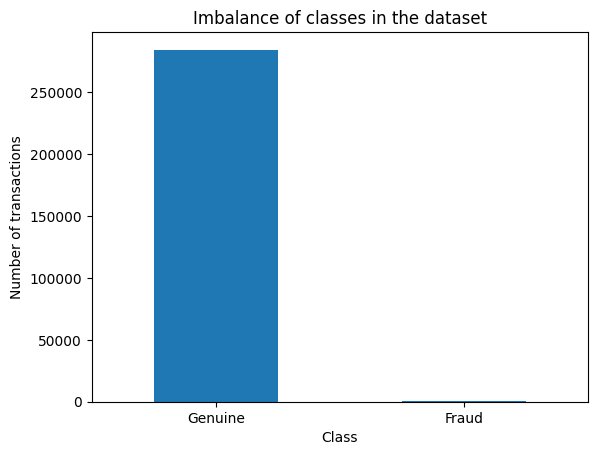

In [ ]:
labels = ['Genuine', 'Fraud']
count_classes = df.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.ylabel('Number of transactions')
plt.title("Imbalance of classes in the dataset")
plt.xticks(range(2), labels)
plt.show()

As we can see the number of non-fraudulent transactions are way more than the fraudulent ones, we clearly see problem of imbalance in the dataset.

Now we will plot the correlation matrix. The correlation matrix gives us an idea of how features are correlated to each other and can predict which features are the most relevant for prediction.

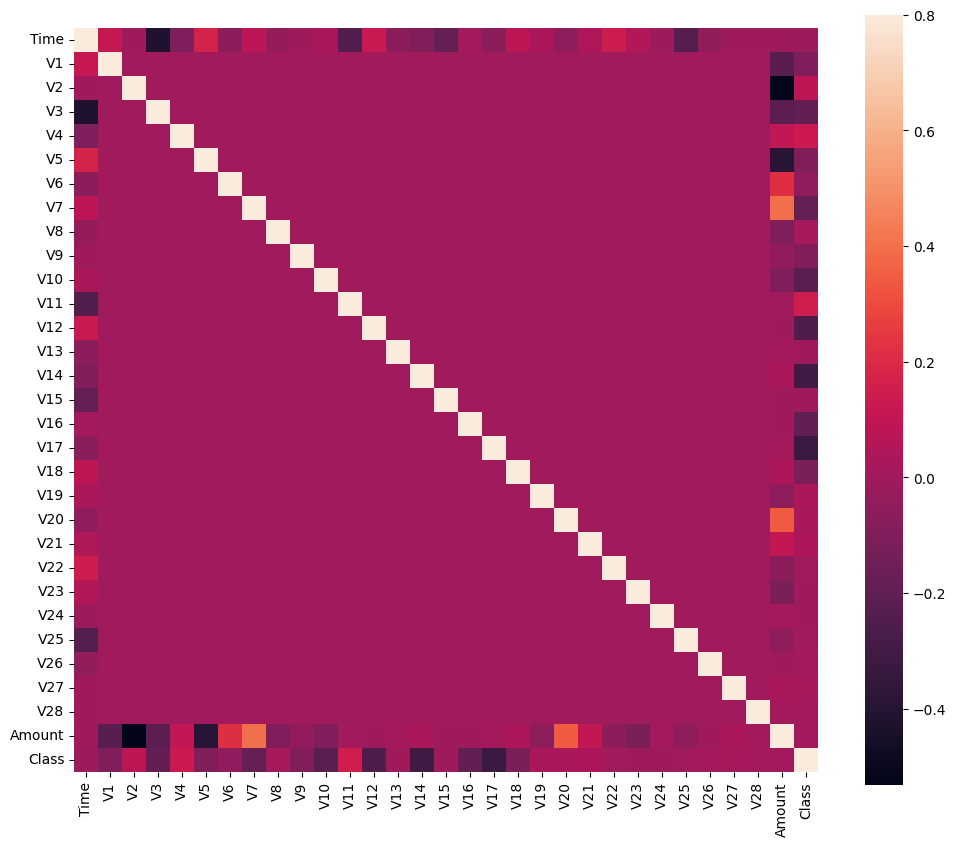

In [ ]:
correlation_matrix = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, vmax = 0.8, square = True)
plt.show()

The heatmap above shows that most of the features do not correlate with each other. The features V2, V5, and V17 shows negative correlation to feature amount, whereas feature V7 and V20 shows postive correlation with the feature amount.

We will first use **Decision Trees** to predict the model. So for using that, we will not use any scaling techniques. The reason is Decision Trees are not distance based algorithm like KNN, Logistic Regression or even SVMs. It is rather a if-else based algorithm, which takes decisions and then forms groups or nodes. So let's apply a simple Decision Tree using the Scikit-learn package in python. This is a classification problem which classifies a transaction to be either fraudulent or non-fraudulent. Also we need to divide the dataset into training and testing sets.

Since we are using Decision Trees as our model, we should be familiar about it. Decision Tree algorithm is a supervised learning algorithm. In our case this means we have features X1, X2,...,X31 as input features and Y being the class as 0 and 1(also called the output feature), where 0 represents non-fraudulent transaction, and 1 representing fraudulent transaction. The underlying model is -

𝐘 = 𝐟(𝐗)

We would be discarding the feature Class as it is the output(or response) variable. So we are left with 30 features, and we would be dividing this dataset into training and testing datasets.



In [ ]:
# We need class labels and the dataset without the time feature

Xdata = df.drop(['Class'], axis = 1)
Ydata = df['Class']
# print(X_train.shape)
# print(Y_train.shape)

# dividing the dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, train_size = 0.7, random_state = 40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 12, max_features="log2")

decision_tree.fit(X_train, Y_train)
predictions = decision_tree.score(X_test, Y_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

print("Decision tree Score =", decision_tree_score)

Decision tree Score = 99.92860737567734


Let's check the feature importance while using the Decision Tree algorithm.

In [ ]:
feature_importance = decision_tree.feature_importances_
print(np.round(feature_importance,3))

[0.004 0.011 0.    0.031 0.014 0.007 0.022 0.018 0.011 0.024 0.018 0.015
 0.059 0.003 0.021 0.007 0.005 0.649 0.009 0.    0.009 0.    0.    0.005
 0.006 0.007 0.003 0.017 0.021 0.007]


Most values we get for feature importance are zeros. Let's plot the values to get some insight.

In [ ]:
features = Xdata.columns
print(features)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [ ]:
# Converting the lables for x-axis into a numpy array
x_axis_labels = np.array(features)
print(type(x_axis_labels))

<class 'numpy.ndarray'>


(0.0, 0.6)

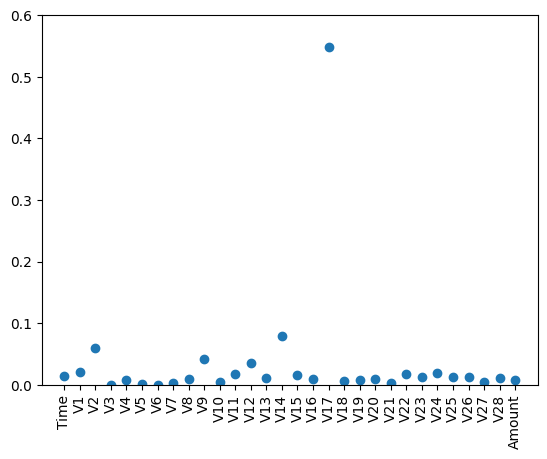

In [ ]:
features = Xdata.columns
# type(features)
plt.plot(feature_importance, 'o')
plt.xticks(range(Xdata.shape[1]), x_axis_labels, rotation = 90)
plt.ylim(0,0.6)

Plotting the Decision Tree is quite important, as we can visually see

In [ ]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree, out_file="Decision_tree.dot", feature_names = features, filled=True, rounded=True)

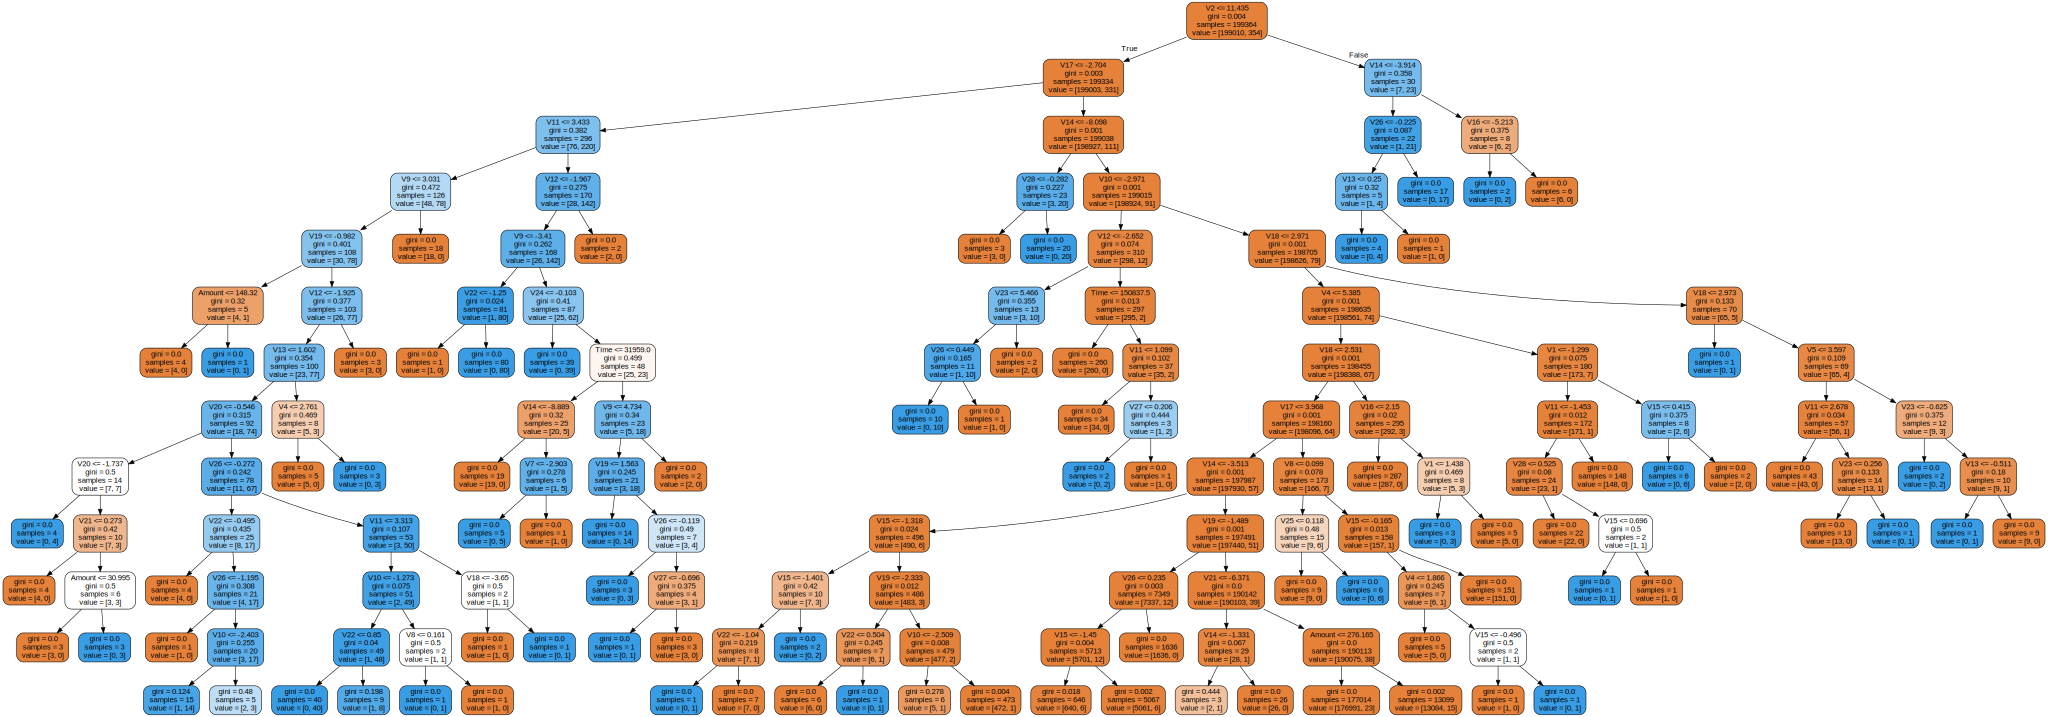

In [ ]:
import graphviz
with open("Decision_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)